### html 페이지와 파이썬 맵 간 연동 테스트를 위한 파이썬 파일

In [ ]:
import folium
import numpy as np
import pandas as pd

In [ ]:
# 자유의여신상 좌표 (위도, 경도)
statue_of_liberty = [40.6892, -74.0445]

# 지도 생성 (중심: 자유의여신상, 확대: 15)
m = folium.Map(location=statue_of_liberty, zoom_start=15)

# 마커 추가
folium.Marker(statue_of_liberty, popup='Statue of Liberty').add_to(m)

m.save("test_map.html")

m

In [4]:
import folium
import branca
from altair import Chart
import vega_datasets
import json

# 데이터와 차트
cars = vega_datasets.data.cars()
scatter = (
    Chart(cars)
    .mark_circle()
    .encode(
        x="Horsepower",
        y="Miles_per_Gallon",
        color="Origin",
    )
)

# 차트를 JSON으로 변환
chart_json = scatter.to_json()

# 팝업 HTML 작성 (텍스트 + 차트)
html = f"""
<h3>Car Data Scatter Plot</h3>
<p>This chart shows Horsepower vs Miles per Gallon, colored by Origin.</p>
<div id="vis"></div>
<script src="https://cdn.jsdelivr.net/npm//vega@5"></script>
<script src="https://cdn.jsdelivr.net/npm//vega-lite@5"></script>
<script src="https://cdn.jsdelivr.net/npm//vega-embed@6"></script>
<script type="text/javascript">
  var spec = {chart_json};
  vegaEmbed('#vis', spec);
</script>
"""

iframe = branca.element.IFrame(html=html, width=600, height=400)
popup = folium.Popup(iframe, max_width=600)

# 지도
m = folium.Map([43, -100],  tiles="Cartodb Positron", zoom_start=4)
folium.Marker([30, -100], popup=popup).add_to(m)

m


/opt/miniconda3/envs/data_analysis/lib/python3.13/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/miniconda3/envs/data_analysis/lib/python3.13/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


### 차트 데이터를 json으로 변경, 그 다음 html 팝업에 삽임

In [ ]:
import folium
import branca
import altair as alt
import pandas as pd
import json

# -------------------------
# 1. 월별 발전량 데이터
# -------------------------
monthly_production = pd.DataFrame({
    "month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    "production": [80, 90, 100, 110, 120, 130, 140, 135, 125, 115, 95, 85]  # MWh
})

# -------------------------
# 2. Altair 바 차트 생성
# -------------------------
chart = alt.Chart(monthly_production).mark_bar().encode(
    x='month',
    y='production'
).properties(
    width=400,
    height=250,
    title="월별 예상 발전량 (MWh)"
)

# JSON으로 변환
chart_json = chart.to_json()

html = f"""
<h3 style="color:#2a9d8f; margin-bottom:10px;">📍 경상북도 포항시</h3>
<p style="margin:3px 0;"><strong>연간 발전량:</strong> 1,123 MWh</p>
<p style="margin:3px 0;"><strong>공급가구:</strong> 4,019가구</p>
<p style="margin:3px 0;"><strong>평균 풍속:</strong> 7.2 m/s</p>
<p style="margin:3px 0;"><strong>적합도:</strong> ★★★★☆</p>
<div id="chart"></div>
<script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
<script src="https://cdn.jsdelivr.net/npm/vega-lite@5"></script>
<script src="https://cdn.jsdelivr.net/npm/vega-embed@6"></script>
<script type="text/javascript">
  var spec = {chart_json};
  vegaEmbed('#chart', spec);
</script>
"""

iframe = branca.element.IFrame(html=html, width=450, height=400)
popup = folium.Popup(iframe, max_width=450)

# -------------------------
# 4. 지도 생성 및 마커 추가
# -------------------------
m = folium.Map([36.02, 129.34], tiles="Cartodb Positron", zoom_start=7)  # 포항 위치
folium.Marker([36.02, 129.34], popup=popup).add_to(m)


# 5 WMS 레이어 추가

# 마커 근처에 이미지 오버레이 추가
img_overlay = folium.raster_layers.ImageOverlay(
    name="Dot Image",
    image="datas/dot.png",  # 이미지 경로
    bounds=[[36.019, 129.339], [36.021, 129.341]],  # 마커 근처 작은 영역
    opacity=1.0,
    interactive=True,
    cross_origin=False,
    zindex=2
)
img_overlay.add_to(m)

# LayerControl로 토글 가능하게
folium.LayerControl().add_to(m)

# -------------------------
# 6. 지도 출력
# -------------------------
m


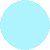
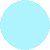
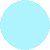
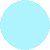
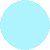
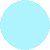
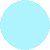
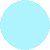
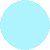
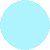
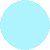
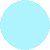
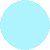
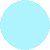
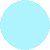
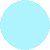
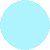
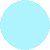
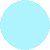
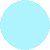
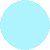
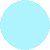
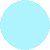
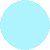
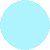
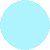
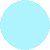
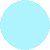
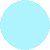
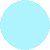
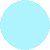
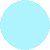
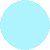
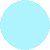
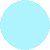
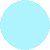
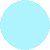
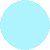
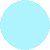
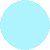
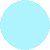
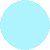
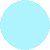
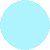
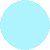
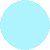
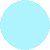
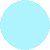
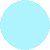
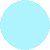
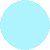
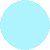
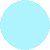
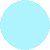
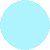
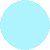
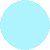
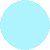
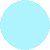
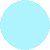
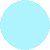
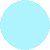
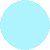
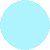
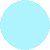
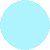
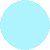
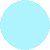
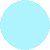
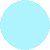
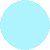
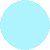
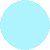
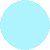
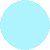
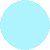
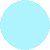
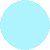
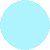
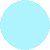
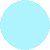
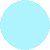
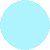
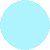
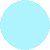
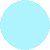
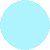
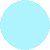
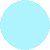
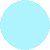
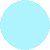

In [4]:
import pandas as pd
import folium

# 데이터 읽기
all_farms = pd.read_excel("datas/Windfarm_Data.xlsx")

# 좌표 처리
if "좌표" in all_farms.columns:
    all_farms[["위도_tmp", "경도_tmp"]] = all_farms["좌표"].astype(str).str.split("\t", expand=True)
    all_farms["위도"] = all_farms["위도"].combine_first(all_farms["위도_tmp"]).astype(float)
    all_farms["경도"] = all_farms["경도"].combine_first(all_farms["경도_tmp"]).astype(float)

# NaN 제거
all_farms = all_farms.dropna(subset=["위도", "경도"])

# 지도 생성
m = folium.Map(location=[36, 127], tiles="Cartodb Positron", zoom_start=7)

# 커스텀 아이콘 크기 (픽셀)
icon_size = (10, 10)

# 지도에 커스텀 아이콘과 팝업 추가
for _, farm in all_farms.iterrows():
    # 팝업 HTML
    popup_html = f"""
    <strong>{farm.get('name', '이름 없음')}</strong><br>
    유형: {farm.get('type', '정보 없음')}<br>
    지역: {farm.get('region', '정보 없음')}<br>
    담당처: {farm.get('operator', '정보 없음')}<br>
    발전량: {farm.get('capacity', '정보 없음')} MW
    """
    
    icon = folium.CustomIcon(
        icon_image="datas/dot.png",
        icon_size=icon_size
    )
    
    folium.Marker(
        location=[farm["위도"], farm["경도"]],
        popup=folium.Popup(popup_html, max_width=250),
        icon=icon
    ).add_to(m)

m



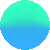
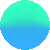
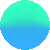
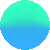
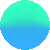
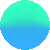
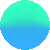
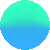
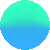
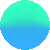
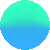
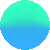
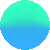
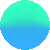
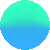
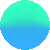
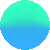
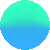
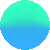
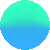

In [ ]:
import folium

# 지도 생성 (중앙 위치와 초기 줌 레벨 설정)
m = folium.Map(location=[36, 127], zoom_start=7)



# 도트 아이콘 크기
icon_size = (15, 15)  # 기본 크기, 필요시 줌 레벨에 맞춰 변경 가능

# 지도에 커스텀 아이콘 추가
for farm in all_farms:
    popup_html = f"""
    <strong>{farm['name']} ({farm['type']})</strong><br>
    지역: {farm['region']}<br>
    담당처: {farm['operator']}<br>
    발전량: {farm['capacity']} MW
    """
    icon = folium.CustomIcon(
        icon_image="datas/dot.png",
        icon_size=icon_size
    )
    folium.Marker(
        location=[farm["lat"], farm["lon"]],
        popup=folium.Popup(popup_html, max_width=250),
        icon=icon
    ).add_to(m)

m


# 풍력발전 데이터 발전량 순으로 정렬

In [2]:
import pandas as pd
file_path = "datas/WindFarm_Data.xlsx"
df = pd.read_excel(file_path)
df["발전량(MW)"] = pd.to_numeric(df["발전량(MW)"], errors="coerce")
# 내림차순 정렬
df_sorted_desc = df.sort_values("발전량(MW)", ascending=False)
# 결과 확인
print(df_sorted_desc.head(10))
# 모든 행 출력
pd.set_option('display.max_rows', None)

# 모든 열 출력
pd.set_option('display.max_columns', None)

# 출력 폭 제한 해제 (긴 문자열도 다 표시)
pd.set_option('display.width', None)

   육/해상    지역      담당처     단지명  발전량(MW)         위도          경도
61   육상   강원도   강원풍력발전      강원     98.0     37.741  128.739400
19   해상  전라남도   한국동서발전      영광     79.6  35.286594  126.341310
75   육상  경상북도     영양양구  영양에코파워     75.9   36.59627  129.198800
21   육상  전라남도   포스코에너지   신안1,2     62.7  34.882297  125.997866
74   육상  경상북도       영양      삼탄     61.5   36.55629  129.241200
72   육상  경상북도     GS영양  GS E&R     59.4   36.61283  129.213400
71   육상  경상북도    울진현종산  SK D&D     53.4   36.86771  129.392000
60   육상   강원도  태기산풍력발전     태기산     40.0    37.6044  128.280900
27   육상  전라남도    대명GEC      영암     40.0  34.826419  126.759734
18   육상  전라남도   한국동서발전    영광백수     40.0  35.280759  126.347716



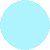
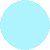
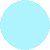
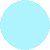
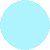
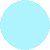
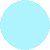
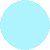
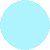
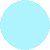
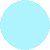
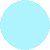
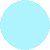
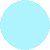
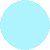
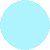
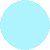
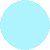
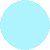
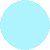
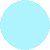
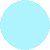
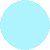
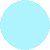
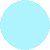
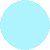
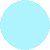
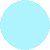
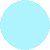
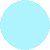
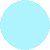
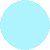
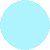
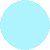
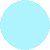
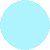
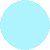
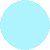
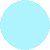
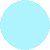
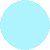
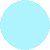
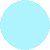
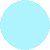
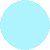
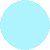
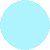
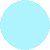
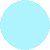
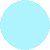
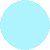
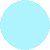
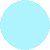
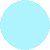
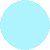
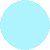
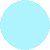
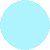
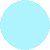
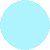
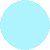
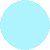
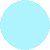
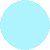
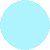
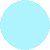
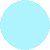
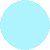
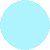
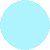
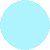
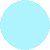
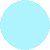
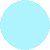
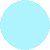
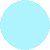
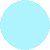
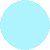
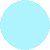
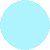
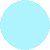

In [3]:
# 발전소 데이터
wind_farms = [
    {"name": "강원", "type": "육상", "region": "강원도", "operator": "강원풍력발전", "capacity": 98.0, "lat": 37.741, "lon": 128.739400},
    {"name": "영광", "type": "해상", "region": "전라남도", "operator": "한국동서발전", "capacity": 79.6, "lat": 35.286594, "lon": 126.341310},
    {"name": "영양에코파워", "type": "육상", "region": "경상북도", "operator": "영양양구", "capacity": 75.9, "lat": 36.59627, "lon": 129.198800},
    {"name": "신안1,2", "type": "육상", "region": "전라남도", "operator": "포스코에너지", "capacity": 62.7, "lat": 34.882297, "lon": 125.997866},
    {"name": "삼탄", "type": "육상", "region": "경상북도", "operator": "영양", "capacity": 61.5, "lat": 36.55629, "lon": 129.241200},
    {"name": "GS E&R", "type": "육상", "region": "경상북도", "operator": "GS영양", "capacity": 59.4, "lat": 36.61283, "lon": 129.213400},
    {"name": "SK D&D", "type": "육상", "region": "경상북도", "operator": "울진현종산", "capacity": 53.4, "lat": 36.86771, "lon": 129.392000},
    {"name": "태기산", "type": "육상", "region": "강원도", "operator": "태기산풍력발전", "capacity": 40.0, "lat": 37.6044, "lon": 128.280900},
    {"name": "영암", "type": "육상", "region": "전라남도", "operator": "대명GEC", "capacity": 40.0, "lat": 34.826419, "lon": 126.759734},
    {"name": "영광백수", "type": "육상", "region": "전라남도", "operator": "한국동서발전", "capacity": 40.0, "lat": 35.280759, "lon": 126.347716},
]

# 지도에 마커 추가
for farm in wind_farms:
    popup_html = f"""
    <strong>{farm['name']} ({farm['type']})</strong><br>
    지역: {farm['region']}<br>
    담당처: {farm['operator']}<br>
    발전량: {farm['capacity']} MW
    """
    folium.Marker(
        location=[farm["lat"], farm["lon"]],
        popup=folium.Popup(popup_html, max_width=250),
        icon=folium.Icon(color="green" if farm["type"]=="육상" else "blue", icon="flash", prefix="fa")
    ).add_to(m)


# 추가 발전소 데이터 (검은색 마커)
additional_wind_farms = [
    {"name": "가사도", "type": "육상", "region": "전라남도", "operator": "한국전력", "capacity": 0.40, "lat": 34.473422, "lon": 126.052349},
    {"name": "가파도", "type": "육상", "region": "제주특별자치도", "operator": "한국남부발전", "capacity": 0.50, "lat": 33.167717, "lon": 126.269034},
    {"name": "고리", "type": "육상", "region": "울산광역시", "operator": "한국수력원자력", "capacity": 0.75, "lat": 35.33516, "lon": 129.294500},
    {"name": "김녕", "type": "육상", "region": "제주특별자치도", "operator": "제주도청", "capacity": 0.75, "lat": 33.560554, "lon": 126.773269},
    {"name": "대불", "type": "육상", "region": "전라남도", "operator": "영암군청", "capacity": 0.75, "lat": 34.768068, "lon": 126.416600},
    {"name": "삼천포", "type": "육상", "region": "경상남도", "operator": "한국남동발전", "capacity": 0.75, "lat": 34.90265, "lon": 128.112000},
    {"name": "월정", "type": "육상", "region": "제주특별자치도", "operator": "한국에너지기술연구원", "capacity": 1.50, "lat": 33.562986, "lon": 126.782135},
    {"name": "현중", "type": "육상", "region": "울산광역시", "operator": "현대중공업", "capacity": 1.65, "lat": 35.52651, "lon": 129.453700},
    {"name": "부안", "type": "육상", "region": "전라북도", "operator": "디앤아이코퍼레이션", "capacity": 1.65, "lat": 35.712477, "lon": 126.598112},
    {"name": "신창", "type": "육상", "region": "제주특별자치도", "operator": "제주에너지공사", "capacity": 1.70, "lat": 33.342449, "lon": 126.178046},
]

# 지도에 검은색 마커로 추가
for farm in additional_wind_farms:
    popup_html = f"""
    <strong>{farm['name']} ({farm['type']})</strong><br>
    지역: {farm['region']}<br>
    담당처: {farm['operator']}<br>
    발전량: {farm['capacity']} MW
    """
    folium.Marker(
        location=[farm["lat"], farm["lon"]],
        popup=folium.Popup(popup_html, max_width=250),
        icon=folium.Icon(color="black", icon="flash", prefix="fa")
    ).add_to(m)


m

In [ ]:
# 필요한 라이브러리 import
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np

# 기상 데이터 직접 생성
weather_data = {
    '위도': [37.741, 35.2865939, 36.59627, 34.88229739, 36.55629, 36.61283,
             36.86771, 35.28075866, 34.82641918, 37.6044],
    '경도': [128.7394, 126.3413102, 129.1988, 125.9978663, 129.2412, 129.2134,
             129.392, 126.3477155, 126.7597344, 128.2809],
    '평균기온(℃)': [7.1, 13.1, 11.2, 13.1, 11.2, 11.2, 12.8, 13.1, 13.7, 11.1],
    '최고기온(℃)': [12.2, 18.3, 17.7, 18.3, 17.7, 17.7, 17.5, 18.3, 19.3, 18.0],
    '최저기온(℃)': [2.3, 8.5, 5.5, 8.5, 5.5, 5.5, 8.7, 8.5, 8.9, 5.5],
    '강수량(mm)': [1695.1, 1277.8, 996.7, 1277.8, 996.7, 996.7, 1181.7, 1277.8, 1218.4, 1331.5]
}
df_weather = pd.DataFrame(weather_data)

# 풍력발전소 데이터 읽기
all_farms = pd.read_excel("datas/Windfarm_Data.xlsx")

# 발전량 데이터 처리
all_farms["발전량(MW)"] = pd.to_numeric(all_farms["발전량(MW)"], errors="coerce")

# 좌표 처리
if "좌표" in all_farms.columns:
    all_farms[["위도_tmp", "경도_tmp"]] = all_farms["좌표"].astype(str).str.split("\t", expand=True)
    all_farms["위도"] = all_farms["위도"].combine_first(all_farms["위도_tmp"]).astype(float)
    all_farms["경도"] = all_farms["경도"].combine_first(all_farms["경도_tmp"]).astype(float)

# NaN 제거
all_farms = all_farms.dropna(subset=["위도", "경도"])

# 지도 생성
m = folium.Map(location=[36, 127], tiles="CartoDB Positron", zoom_start=7)

# 커스텀 아이콘 크기 (픽셀)
icon_size = (10, 10)

# 발전량 기준으로 정렬하여 상위 10개 식별
all_farms_sorted = all_farms.sort_values('발전량(MW)', ascending=False, na_position='last')
top_10_indices = all_farms_sorted.head(10).index
rename = [
    "강원풍력발전",
    "한국동서발전_영광",
    "영양에코파워",
    "신안1,2_포스코에너지",
    "삼탄_영양",
    "GS_E&R_영양",
    "SK_D&D_울진",
    "한국동서발전_영광백수",
    "영암_대명GEC",
    "태기산_강원도"
]
# 상위 10개 단지명 변경
for i, idx in enumerate(top_10_indices):
    all_farms.at[idx, '단지명'] = rename[i]


# 지도에 마커 추가 (상위 10개는 큰 일반마커, 나머지는 커스텀 마커)
for idx, farm in all_farms.iterrows():
    # 팝업 내용 생성 (onclick 직접 사용)
    farm_name = str(farm.get('단지명', '풍력발전소')).replace("'", "")
    region = str(farm.get('지역', 'N/A')).replace("'", "")
    capacity = str(farm.get('발전량(MW)', 'N/A')).replace("'", "")
    
    popup_text = f"""
    <div style='width: 200px; font-family: Arial, sans-serif;'>
        <h4 style='margin: 5px 0; color: #2E4057;'>{farm_name}</h4>
        <hr style='margin: 5px 0;'>
        <p style='margin: 3px 0;'><b>지역:</b> {region}</p>
        <p style='margin: 3px 0;'><b>발전량:</b> {capacity} MW</p>
        <button onclick="parent.postMessage({{type:'markerClick',name:'{farm_name}',region:'{region}',capacity:'{capacity}'}}, '*');" 
                style='background: #2E4057; color: white; border: none; padding: 5px 10px; border-radius: 3px; cursor: pointer; margin-top: 10px;'>
            상세보기
        </button>
    </div>
    """
    # 상위 10개는 큰 일반 마커 사용
    if idx in top_10_indices: 
        capacity = farm.get('발전량(MW)', 0) 
        if pd.isna(capacity): 
            marker_color = 'black' 
        elif capacity >= 90: 
            marker_color = 'darkblue' 
        elif capacity >= 60: 
            marker_color = 'blue'  
        else: 
            marker_color = 'lightblue' 

        folium.Marker(
            location=[farm["위도"], farm["경도"]],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(
                color=marker_color,  # 마커 색
                icon='wind',         # Font Awesome 아이콘 이름
                prefix='fa'          # Font Awesome 사용
            )
        ).add_to(m)

    
    # 나머지는 작은 커스텀 마커 사용
    else:
        try:
            # 커스텀 아이콘 사용 시도
            icon = folium.CustomIcon(
                icon_image="datas/dot.png",
                icon_size=icon_size
            )
            folium.Marker(
                location=[farm["위도"], farm["경도"]],
                icon=icon,
            ).add_to(m)
        except:
            # 커스텀 아이콘이 없으면 작은 원형 마커 사용
            folium.CircleMarker(
                location=[farm["위도"], farm["경도"]],
                radius=4,
                fillColor='lightblue',
                color='navy',
                weight=1,
                fillOpacity=0.7
            ).add_to(m)





# ---------------- 히트맵 부분 (기존과 동일) ----------------
# 1. 평균기온 히트맵
avg_temp_fg = folium.FeatureGroup(name="평균기온 히트맵", show=True)
avg_temp_data = [[row['위도'], row['경도'], row['평균기온(℃)']] for idx, row in df_weather.iterrows()]
HeatMap(
    avg_temp_data,
    radius=30,
    gradient={0.0: 'blue', 0.3: 'cyan', 0.5: 'lime', 0.7: 'yellow', 1.0: 'red'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(avg_temp_fg)

# 2. 최고기온 히트맵
max_temp_fg = folium.FeatureGroup(name="최고기온 히트맵", show=False)
max_temp_data = [[row['위도'], row['경도'], row['최고기온(℃)']] for idx, row in df_weather.iterrows()]
HeatMap(
    max_temp_data,
    radius=30,
    gradient={0.0: 'orange', 0.5: 'red', 1.0: 'darkred'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(max_temp_fg)

# 3. 최저기온 히트맵
min_temp_fg = folium.FeatureGroup(name="최저기온 히트맵", show=False)
min_temp_data = [[row['위도'], row['경도'], row['최저기온(℃)']] for idx, row in df_weather.iterrows()]
HeatMap(
    min_temp_data,
    radius=30,
    gradient={0.0: 'darkblue', 0.5: 'blue', 1.0: 'lightblue'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(min_temp_fg)

# 4. 강수량 히트맵
rainfall_fg = folium.FeatureGroup(name="강수량 히트맵", show=False)
min_rain = df_weather['강수량(mm)'].min()
max_rain = df_weather['강수량(mm)'].max()
rainfall_data = [[row['위도'], row['경도'], (row['강수량(mm)'] - min_rain) / (max_rain - min_rain)]
                 for idx, row in df_weather.iterrows()]
HeatMap(
    rainfall_data,
    radius=30,
    gradient={0.0: 'lightgreen', 0.3: 'green', 0.6: 'blue', 1.0: 'darkblue'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(rainfall_fg)

# 모든 레이어를 지도에 추가
avg_temp_fg.add_to(m)
max_temp_fg.add_to(m)
min_temp_fg.add_to(m)
rainfall_fg.add_to(m)

# 레이어 컨트롤 추가
folium.LayerControl().add_to(m)


m


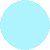
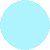
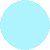
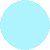
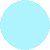
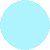
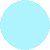
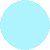
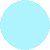
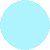
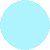
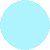
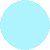
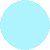
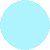
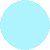
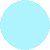
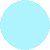
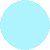
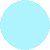
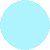
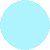
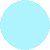
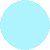
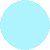
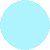
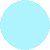
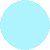
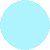
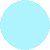
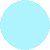
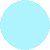
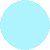
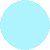
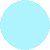
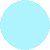
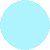
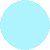
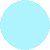
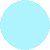
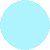
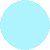
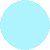
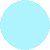
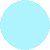
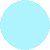
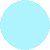
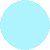
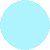
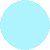
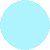
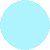
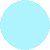
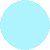
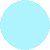
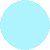
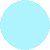
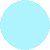
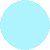
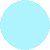
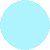
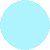
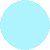
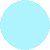
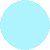
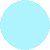
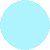
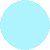
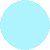
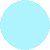
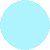
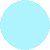
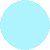
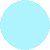
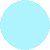
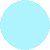
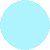
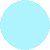
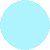
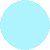
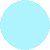

In [4]:
# 역순지도
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np

# 기상 데이터 직접 생성
weather_data = {
    '위도': [33.34244878, 35.71247661, 35.52651, 33.56298551, 34.76806819,
             33.56055401, 35.33516, 34.90265, 33.16771669, 34.47342188],
    '경도': [126.1780464, 126.5981115, 129.4537, 126.7821355, 126.4166,
             126.7732691, 129.2945, 128.112, 126.2690342, 126.0523492],
    '평균기온(℃)': [16.2, 12.9, 14.4, 15.6, 13.7, 15.6, 15.4, 14.7, 16.9, 13.9],
    '최고기온(℃)': [19.3, 18.3, 19.4, 19.2, 19.3, 19.2, 19.1, 18.9, 20.3, 18.6],
    '최저기온(℃)': [13.4, 8.4, 10.2, 12.1, 8.9, 12.1, 12, 11.3, 13.9, 9.6],
    '강수량(mm)': [1502.3, 1238, 1292.6, 2030, 1218.4, 2030, 1514, 1446.3, 1989.6, 1374.7]
}

df_weather = pd.DataFrame(weather_data)

# 풍력발전소 데이터 읽기
all_farms = pd.read_excel("datas/Windfarm_Data.xlsx")

# 발전량 데이터 처리
all_farms["발전량(MW)"] = pd.to_numeric(all_farms["발전량(MW)"], errors="coerce")

# 좌표 처리
if "좌표" in all_farms.columns:
    all_farms[["위도_tmp", "경도_tmp"]] = all_farms["좌표"].astype(str).str.split("\t", expand=True)
    all_farms["위도"] = all_farms["위도"].combine_first(all_farms["위도_tmp"]).astype(float)
    all_farms["경도"] = all_farms["경도"].combine_first(all_farms["경도_tmp"]).astype(float)

# NaN 제거
all_farms = all_farms.dropna(subset=["위도", "경도"])

# 지도 생성
m = folium.Map(location=[36, 127], tiles="CartoDB dark_matter", zoom_start=7)

# 커스텀 아이콘 크기 (픽셀)
icon_size = (10, 10)

# 발전량 기준으로 정렬하여 상위 10개 식별
all_farms_sorted = all_farms.sort_values('발전량(MW)', ascending=False, na_position='last')
bottom_10_indices = all_farms_sorted.tail(10).index

# 지도에 마커 추가 (상위 10개는 큰 일반마커, 나머지는 커스텀 마커)
for idx, farm in all_farms.iterrows():
    # 팝업 내용 생성
    popup_text = f"""
    <div style='width: 200px; font-family: Arial, sans-serif;'>
        <h4 style='margin: 5px 0; color: #2E4057;'>{farm.get('단지명', '풍력발전소')}</h4>
        <hr style='margin: 5px 0;'>
        <p style='margin: 3px 0;'><b>지역:</b> {farm.get('지역', 'N/A')}</p>
        <p style='margin: 3px 0;'><b>발전량:</b> {farm.get('발전량(MW)', 'N/A')} MW</p>
        <p style='margin: 3px 0;'><b>:</b> {farm.get('발전량(MW)', 'N/A')} MW</p>
    </div>
    """
    
    # 상위 10개는 큰 일반 마커 사용
    if idx in bottom_10_indices: 
        capacity = farm.get('발전량(MW)', 0) 
        if pd.isna(capacity): 
            marker_color = 'black' 
        elif capacity >= 90: 
            marker_color = 'darkblue' 
        elif capacity >= 60: 
            marker_color = 'darkred'  
        else: 
            marker_color = 'red' 

        folium.Marker(
            location=[farm["위도"], farm["경도"]],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(
                color=marker_color,  # 마커 색
                icon='wind',         # Font Awesome 아이콘 이름
                prefix='fa'          # Font Awesome 사용
            )
        ).add_to(m)

    
    # 나머지는 작은 커스텀 마커 사용
    else:
        try:
            # 커스텀 아이콘 사용 시도
            icon = folium.CustomIcon(
                icon_image="datas/dot.png",
                icon_size=icon_size
            )
            folium.Marker(
                location=[farm["위도"], farm["경도"]],
                icon=icon,
            ).add_to(m)
        except:
            # 커스텀 아이콘이 없으면 작은 원형 마커 사용
            folium.CircleMarker(
                location=[farm["위도"], farm["경도"]],
                radius=4,
                fillColor='lightblue',
                color='navy',
                weight=1,
                fillOpacity=0.7
            ).add_to(m)

# ---------------- 히트맵 부분 (기존과 동일) ----------------
# 1. 평균기온 히트맵
avg_temp_fg = folium.FeatureGroup(name="평균기온 히트맵", show=True)
avg_temp_data = [[row['위도'], row['경도'], row['평균기온(℃)']] for idx, row in df_weather.iterrows()]
HeatMap(
    avg_temp_data,
    radius=30,
    gradient={0.0: 'blue', 0.3: 'cyan', 0.5: 'lime', 0.7: 'yellow', 1.0: 'red'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(avg_temp_fg)

# 2. 최고기온 히트맵
max_temp_fg = folium.FeatureGroup(name="최고기온 히트맵", show=False)
max_temp_data = [[row['위도'], row['경도'], row['최고기온(℃)']] for idx, row in df_weather.iterrows()]
HeatMap(
    max_temp_data,
    radius=30,
    gradient={0.0: 'orange', 0.5: 'red', 1.0: 'darkred'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(max_temp_fg)

# 3. 최저기온 히트맵
min_temp_fg = folium.FeatureGroup(name="최저기온 히트맵", show=False)
min_temp_data = [[row['위도'], row['경도'], row['최저기온(℃)']] for idx, row in df_weather.iterrows()]
HeatMap(
    min_temp_data,
    radius=30,
    gradient={0.0: 'darkblue', 0.5: 'blue', 1.0: 'lightblue'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(min_temp_fg)

# 4. 강수량 히트맵
rainfall_fg = folium.FeatureGroup(name="강수량 히트맵", show=False)
min_rain = df_weather['강수량(mm)'].min()
max_rain = df_weather['강수량(mm)'].max()
rainfall_data = [[row['위도'], row['경도'], (row['강수량(mm)'] - min_rain) / (max_rain - min_rain)]
                 for idx, row in df_weather.iterrows()]
HeatMap(
    rainfall_data,
    radius=30,
    gradient={0.0: 'lightgreen', 0.3: 'green', 0.6: 'blue', 1.0: 'darkblue'},
    min_opacity=0.3,
    max_zoom=18,
    blur=25
).add_to(rainfall_fg)

# 모든 레이어를 지도에 추가
avg_temp_fg.add_to(m)
max_temp_fg.add_to(m)
min_temp_fg.add_to(m)
rainfall_fg.add_to(m)

# 레이어 컨트롤 추가
folium.LayerControl().add_to(m)


m

In [18]:
# ----------------- 필수 라이브러리 -----------------
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np

# ----------------- 기상 데이터 -----------------
weather_data = {
    '위도': [37.741, 35.2865939, 36.59627, 34.88229739, 36.55629, 36.61283,
             36.86771, 35.28075866, 34.82641918, 37.6044],
    '경도': [128.7394, 126.3413102, 129.1988, 125.9978663, 129.2412, 129.2134,
             129.392, 126.3477155, 126.7597344, 128.2809],
    '평균기온(℃)': [7.1, 13.1, 11.2, 13.1, 11.2, 11.2, 12.8, 13.1, 13.7, 11.1],
    '최고기온(℃)': [12.2, 18.3, 17.7, 18.3, 17.7, 17.7, 17.5, 18.3, 19.3, 18.0],
    '최저기온(℃)': [2.3, 8.5, 5.5, 8.5, 5.5, 5.5, 8.7, 8.5, 8.9, 5.5],
    '강수량(mm)': [1695.1, 1277.8, 996.7, 1277.8, 996.7, 996.7, 1181.7, 1277.8, 1218.4, 1331.5]
}
df_weather = pd.DataFrame(weather_data)

# ----------------- 풍력발전소 데이터 -----------------
all_farms = pd.read_excel("datas/Windfarm_Data.xlsx")
all_farms["발전량(MW)"] = pd.to_numeric(all_farms["발전량(MW)"], errors="coerce")

# 좌표 처리
if "좌표" in all_farms.columns:
    all_farms[["위도_tmp", "경도_tmp"]] = all_farms["좌표"].astype(str).str.split("\t", expand=True)
    all_farms["위도"] = all_farms["위도"].combine_first(all_farms["위도_tmp"]).astype(float)
    all_farms["경도"] = all_farms["경도"].combine_first(all_farms["경도_tmp"]).astype(float)

# NaN 제거
all_farms = all_farms.dropna(subset=["위도", "경도"])

# ----------------- 상위 10개 단지명 JSON key와 일치 -----------------
all_farms_sorted = all_farms.sort_values('발전량(MW)', ascending=False, na_position='last')
top_10_indices = all_farms_sorted.head(10).index

rename = [
    "강원풍력발전",
    "한국동서발전_영광",
    "영양에코파워",
    "신안1,2_포스코에너지",
    "삼탄_영양",
    "GS_E&R_영양",
    "SK_D&D_울진",
    "한국동서발전_영광백수",
    "영암_대명GEC",
    "태기산_강원도"
]

# JSON key와 정확히 일치하도록 단지명 변경
for i, idx in enumerate(top_10_indices):
    all_farms.at[idx, '단지명'] = rename[i]


# ----------------- 지도 생성 -----------------
m = folium.Map(location=[36, 127], tiles="CartoDB Positron", zoom_start=7)
icon_size = (10, 10)

# ----------------- 마커 추가 -----------------
for idx, farm in all_farms.iterrows():
    farm_name = str(farm.get('단지명', '풍력발전소')).replace("'", "")
    region = str(farm.get('지역', 'N/A')).replace("'", "")
    capacity = str(farm.get('발전량(MW)', 'N/A')).replace("'", "")
    
    popup_text = f"""
    <div style='width: 200px; font-family: Arial, sans-serif;'>
        <h4 style='margin: 5px 0; color: #2E4057;'>{farm_name}</h4>
        <hr style='margin: 5px 0;'>
        <p style='margin: 3px 0;'><b>지역:</b> {region}</p>
        <p style='margin: 3px 0;'><b>발전량:</b> {capacity} MW</p>
        <button onclick="parent.postMessage({{type:'markerClick',name:'{farm_name}',region:'{region}',capacity:'{capacity}'}}, '*');" 
                style='background: #2E4057; color: white; border: none; padding: 5px 10px; border-radius: 3px; cursor: pointer; margin-top: 10px;'>
            상세보기
        </button>
    </div>
    """
    
    if idx in top_10_indices:
        capacity_val = farm.get('발전량(MW)', 0)
        if pd.isna(capacity_val): 
            marker_color = 'black' 
        elif capacity_val >= 90: 
            marker_color = 'darkblue' 
        elif capacity_val >= 60: 
            marker_color = 'blue'  
        else: 
            marker_color = 'lightblue' 

        folium.Marker(
            location=[farm["위도"], farm["경도"]],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(
                color=marker_color,
                icon='wind',
                prefix='fa'
            )
        ).add_to(m)
    else:
        try:
            icon = folium.CustomIcon(
                icon_image="datas/dot.png",
                icon_size=icon_size
            )
            folium.Marker(
                location=[farm["위도"], farm["경도"]],
                icon=icon,
            ).add_to(m)
        except:
            folium.CircleMarker(
                location=[farm["위도"], farm["경도"]],
                radius=4,
                fillColor='lightblue',
                color='navy',
                weight=1,
                fillOpacity=0.7
            ).add_to(m)

# ----------------- 히트맵 -----------------
# 평균, 최고, 최저 기온, 강수량 동일하게 처리
# (생략: 기존 코드 그대로 사용)

# 모든 레이어 추가
avg_temp_fg.add_to(m)
max_temp_fg.add_to(m)
min_temp_fg.add_to(m)
rainfall_fg.add_to(m)
folium.LayerControl().add_to(m)

# 지도 출력
m.save("map01.html")
